Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

In [2]:
df=pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
df.shape

(50, 5)

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
df[df.duplicated]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [10]:
Q1=df['Murder'].quantile(0.25)
Q1

4.075

In [11]:
Q3=df['Murder'].quantile(0.75)
Q3

11.25

In [12]:
IQR=Q3-Q1
IQR

7.175

In [13]:
upper_extreme=Q3+1.5*IQR
upper_extreme

22.0125

In [14]:
lower_extreme=Q1-1.5*IQR
lower_extreme

-6.687499999999999

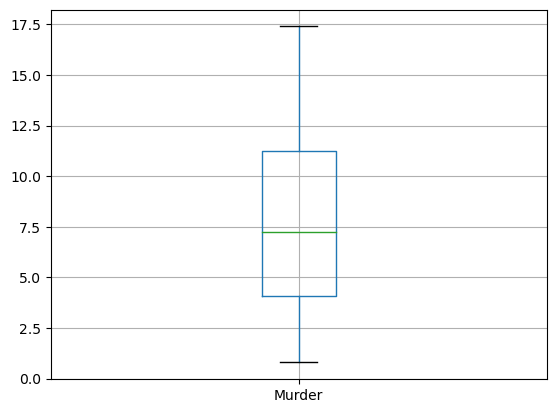

In [15]:
df.boxplot('Murder')
plt.show()

In [16]:
df_outliers=df[(df.Murder<lower_extreme)|(df.Murder>upper_extreme)]
df_outliers

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [17]:
df_no_outliers=df[(df.Murder>lower_extreme)|(df.Murder<upper_extreme)]
df_no_outliers

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


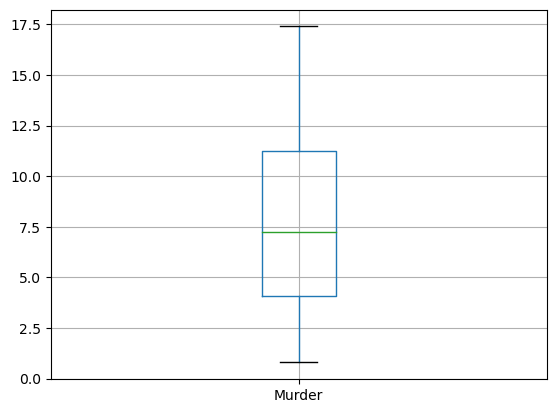

In [18]:
df_no_outliers.boxplot('Murder')
plt.show()

In [19]:
features=df.drop('Unnamed: 0',axis=1)
features

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [20]:
kmeans=KMeans(n_clusters=3)
import warnings
warnings.filterwarnings('ignore')

In [21]:
cluster=kmeans.fit(features)

In [22]:
np.unique(cluster.labels_)

array([0, 1, 2])

In [23]:
df['cluster']=cluster.labels_

In [24]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,0


In [25]:
df[df['cluster']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
17,Louisiana,15.4,249,66,22.2,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1


In [26]:
df[df['cluster']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
3,Arkansas,8.8,190,50,19.5,0
5,Colorado,7.9,204,78,38.7,0
9,Georgia,17.4,211,60,25.8,0
20,Massachusetts,4.4,149,85,16.3,0
24,Missouri,9.0,178,70,28.2,0
29,New Jersey,7.4,159,89,18.8,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0
38,Rhode Island,3.4,174,87,8.3,0
41,Tennessee,13.2,188,59,26.9,0


In [27]:
df[df['cluster']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
6,Connecticut,3.3,110,77,11.1,2
10,Hawaii,5.3,46,83,20.2,2
11,Idaho,2.6,120,54,14.2,2
13,Indiana,7.2,113,65,21.0,2
14,Iowa,2.2,56,57,11.3,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2


In [73]:
sns.lmplot(data=df,x='Murder',y='Assault',hue='cluster')

In [72]:
sns.lmplot(data=df,x='UrbanPop',y='Rape',hue='cluster')

# Elbow metghod to find optimum k value

In [30]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(features)

KMeans(n_clusters=4)

In [31]:
kmeans.inertia_

34728.629357142854

In [32]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
print(inertia)    

[355807.8216, 96399.02814449917, 47964.26535714286, 34728.629357142854, 24417.023523809523, 18850.365333333335, 15570.937333333333, 13402.469583333334, 11125.03380952381, 10492.952007936507]


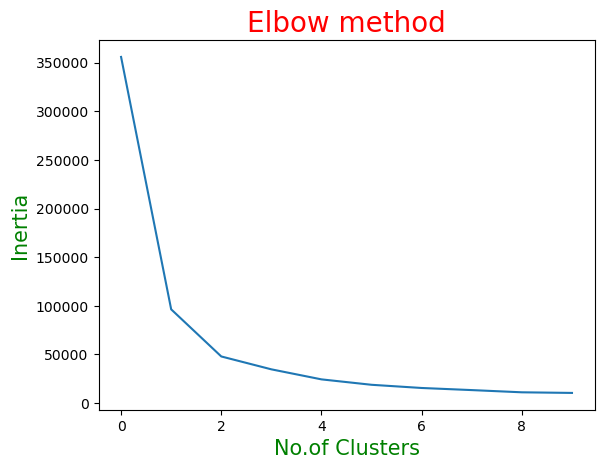

In [71]:
plt.plot(range(10),inertia)
plt.xlabel('No.of Clusters',size=15,color="green")
plt.ylabel('Inertia',size=15,color="green")
plt.title('Elbow method',size=20,color="red")
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
silhouette_score(features,cluster.labels_)

0.5319024108339817

In [36]:
cluster.labels_

array([1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0])

# Heirachial Clustering

In [37]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [38]:
dendrogram=sch.dendrogram(sch.linkage(features,method='average'))

In [39]:
agg=AgglomerativeClustering(n_clusters=4,linkage='ward')

In [40]:
agg.fit(features)

AgglomerativeClustering(n_clusters=4)

In [41]:
agg.labels_

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [42]:
silhouette_score(features,agg.labels_)

0.5012332370891494

# DBSCAN

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [44]:
std_sca=StandardScaler()

In [45]:
df_new=pd.DataFrame(std_sca.fit_transform(features),columns=features.columns)
df_new

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [46]:
cluster=DBSCAN(eps=2,min_samples=2).fit(df_new)

In [47]:
cluster.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [48]:
np.unique(cluster.labels_)

array([-1,  0], dtype=int64)

In [49]:
sns.scatterplot(data=df_new,x='Murder',y='Assault',hue=cluster)

<Axes: title={'center': 'Elbow method'}, xlabel='No.of Clusters', ylabel='Inertia'>

In [50]:
sns.scatterplot(data=df_new,x='UrbanPop',y='Murder',hue=cluster)

<Axes: title={'center': 'Elbow method'}, xlabel='No.of Clusters', ylabel='Inertia'>

In [51]:
sns.scatterplot(data=df_new,x='Murder',y='Rape',hue=cluster)

<Axes: title={'center': 'Elbow method'}, xlabel='No.of Clusters', ylabel='Inertia'>

In [52]:
cluster1=pd.DataFrame(cluster.labels_,columns=['cluster'])
cluster1

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [53]:
df2=pd.concat([df,cluster1],axis=1)

In [54]:
df2=df2.rename(columns={'Unnamed: 0':"Area"})
df2

,Area,Murder,Assault,UrbanPop,Rape,cluster,cluster
0,Alabama,13.2,236,58,21.2,1,0
1,Alaska,10.0,263,48,44.5,1,-1
2,Arizona,8.1,294,80,31.0,1,0
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,1,0
5,Colorado,7.9,204,78,38.7,0,0
6,Connecticut,3.3,110,77,11.1,2,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,1,0
9,Georgia,17.4,211,60,25.8,0,0


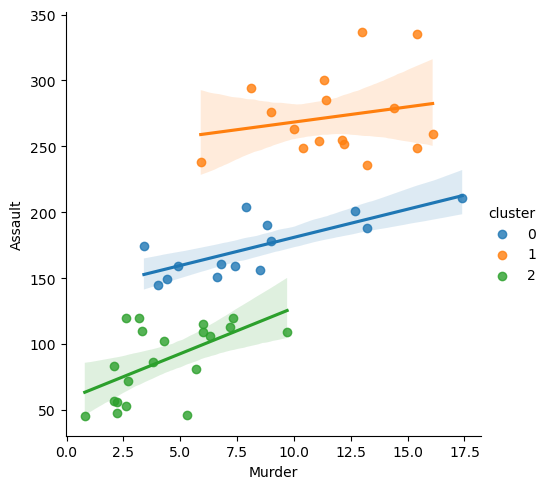

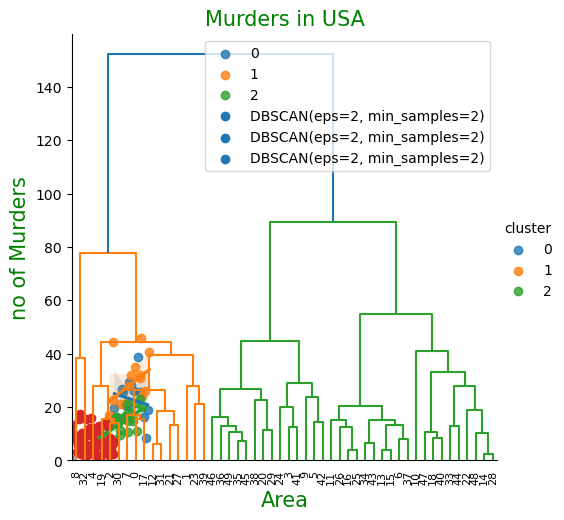

In [55]:
plt.scatter(x=df2['Area'],y=df2['Murder'])
plt.title('Murders in USA',color="green",size=15)
plt.xlabel('Area')
plt.ylabel('no of Murders')
plt.show()

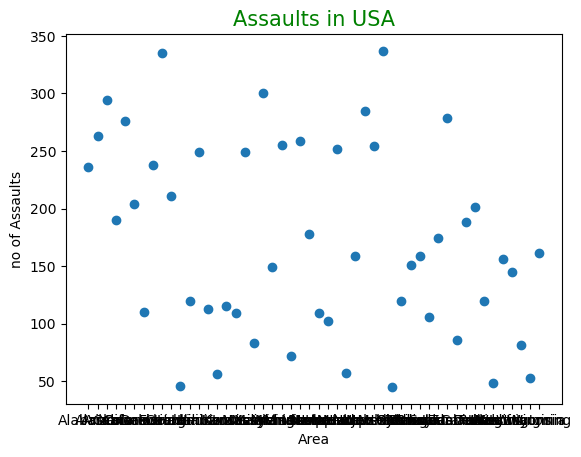

In [56]:
plt.scatter(x=df2['Area'],y=df2['Assault'])
plt.title('Assaults in USA',color="green",size=15)
plt.xlabel('Area')
plt.ylabel('no of Assaults')
plt.show()

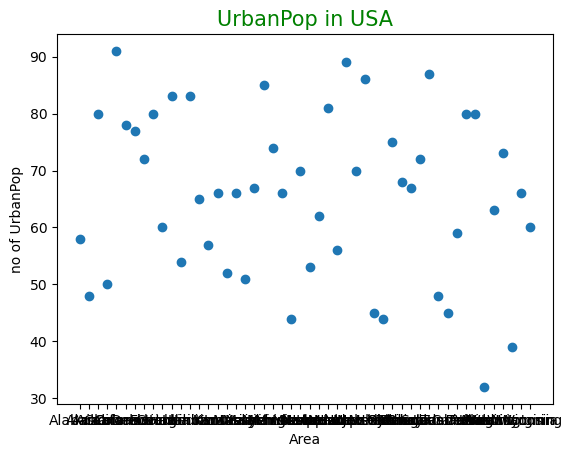

In [57]:
plt.scatter(x=df2['Area'],y=df2['UrbanPop'])
plt.title('UrbanPop in USA',color="green",size=15)
plt.xlabel('Area')
plt.ylabel('no of UrbanPop')
plt.show()

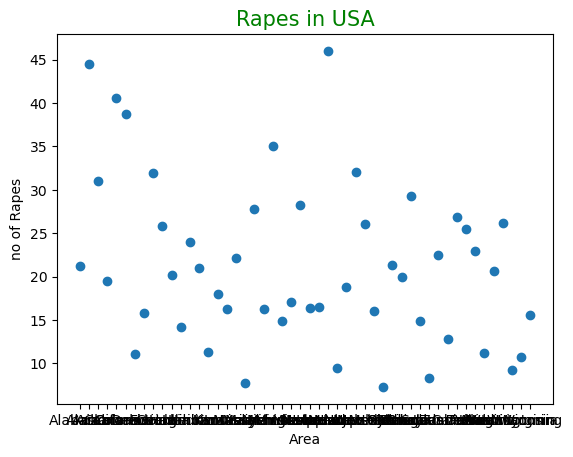

In [58]:
plt.scatter(x=df2['Area'],y=df2['Rape'])
plt.title('Rapes in USA',color="green",size=15)
plt.xlabel('Area')
plt.ylabel('no of Rapes')
plt.show()

In [59]:
silhouette_score(df_new,cluster.labels_)

0.23455598753159795

# EastWestAirlines

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.


In [60]:
airline=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [61]:
print(airline.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [62]:
airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [63]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [64]:
airline[airline.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [65]:
airline.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [66]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [67]:
df_norm=norm_func(airline.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [75]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [76]:
dendgrogram=sch.dendrogram(sch.linkage(df_norm, method='complete'))

# Hierachial Clustering

In [77]:
agg_1=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [78]:
agg=agg_1.fit_predict(df_norm)
Clusters=pd.DataFrame(agg,columns=['Clusters'])

In [80]:
df_norm['h_clusterid']=Clusters
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,2
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,2
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,2
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,2
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,2


# KMeans

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_airline=scaler.fit_transform(airline.iloc[:,1:])

In [82]:
scaled_airline

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

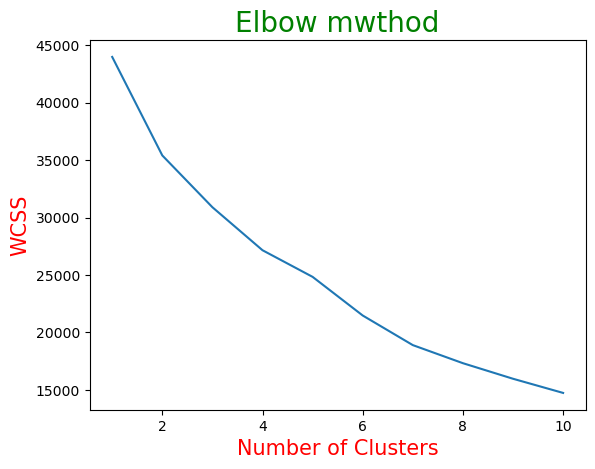

In [86]:
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,random_state=0)
    Kmeans.fit(scaled_airline)
    wcss.append(Kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow mwthod',color='green',size=20)
plt.xlabel('Number of Clusters',color='red',size=15)
plt.ylabel('WCSS',color='red',size=15)
plt.show()

In [87]:
cluster_new=KMeans(4,random_state=42)
cluster_new.fit(scaled_airline)

KMeans(n_clusters=4, random_state=42)

In [88]:
cluster_new.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [96]:
np.unique(cluster.labels_)

array([-1,  0], dtype=int64)

In [90]:
airline['clusterid_new']=cluster_new.labels_
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [92]:
airline.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
1,1,2243.737318,43793.917814,97.436886,1.221785,1.019269,1.000393,4700.690916,6.918993,198.621707,0.618168,3691.559969,0.201337
2,2,1596.204242,116817.336214,154.756481,3.701493,1.002357,1.001571,39216.199529,18.759623,334.355852,0.997643,4893.491752,0.648075
3,3,1752.964286,191573.726190,775.863095,2.172619,1.035714,1.000000,31412.160714,26.779762,5365.672619,15.636905,4665.827381,0.809524


In [93]:
airline[airline['clusterid_new']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,3
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,3
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,3
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,3
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,3
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,3
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,3


In [95]:
airline[airline['clusterid_new']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,0
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,0
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,0
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,0
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,0
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,0
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,0
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,0
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,0
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,0


# DBCSAN

In [97]:
array=airline.values
array

array([[    1, 28143,     0, ...,  7000,     0,     1],
       [    2, 19244,     0, ...,  6968,     0,     1],
       [    3, 41354,     0, ...,  7034,     0,     1],
       ...,
       [ 4019, 73597,     0, ...,  1402,     1,     2],
       [ 4020, 54899,     0, ...,  1401,     0,     1],
       [ 4021,  3016,     0, ...,  1398,     0,     1]], dtype=int64)

In [98]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01, -6.92572061e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01, -6.92572061e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01, -6.92572061e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.04494091e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -6.92572061e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -6.92572061e-01]])

In [99]:
dbscan=DBSCAN(eps=0.8,min_samples=12)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=12)

In [100]:
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [101]:
cluster1=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cluster1

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,2
3997,0


In [104]:
cl=pd.concat([airline,cluster1],axis=1)
cl

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0


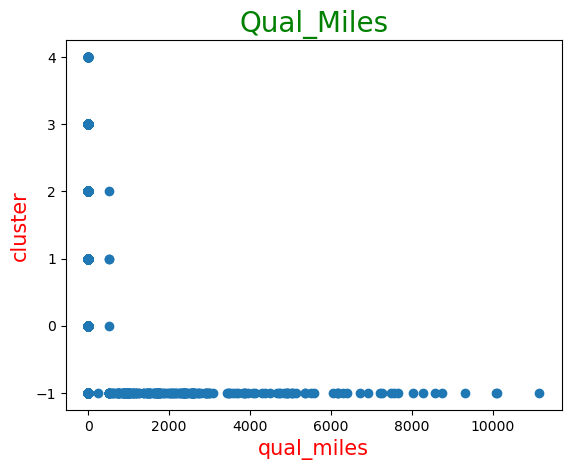

In [111]:
plt.scatter(x=airline['Qual_miles'],y=cl['cluster'])
plt.title('Qual_Miles',color="green",size=20)
plt.xlabel('qual_miles',color='red',size=15)
plt.ylabel('cluster',color='red',size=15)
plt.show()

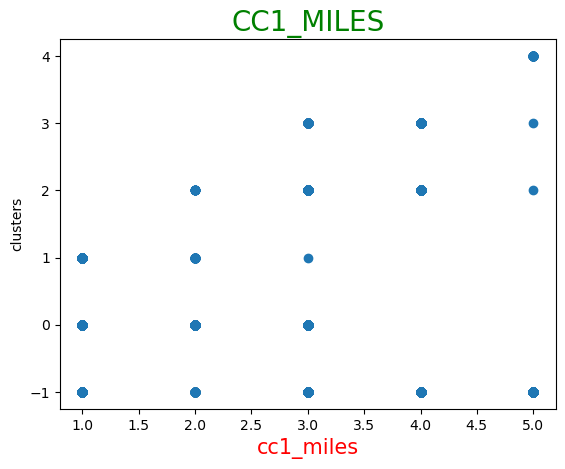

In [110]:
plt.scatter(x=airline['cc1_miles'],y=cl['cluster'])
plt.title('CC1_MILES',color="green",size=20)
plt.xlabel('cc1_miles',color='red',size=15)
plt.ylabel('clusters')
plt.show()

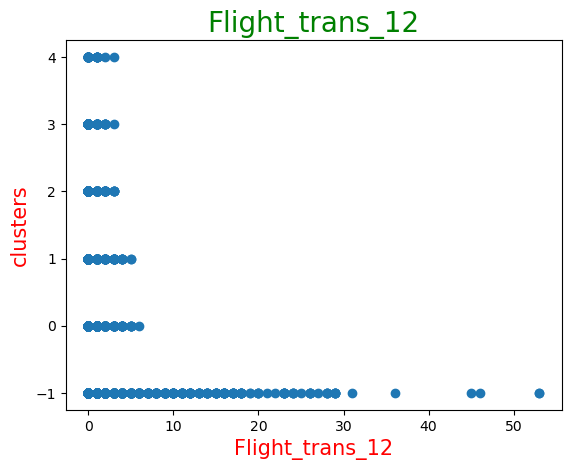

In [109]:
plt.scatter(x=airline['Flight_trans_12'],y=cl['cluster'])
plt.title('Flight_trans_12',color="green",size=20)
plt.xlabel('Flight_trans_12',color='red',size=15)
plt.ylabel('clusters',color='red',size=15)
plt.show()